In [1]:
# imports
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# rainforest classifier
from sklearn.ensemble import RandomForestClassifier

# linear regession classifier
from sklearn.linear_model import LogisticRegression

# knn classifier
from sklearn.neighbors import KNeighborsClassifier
import wrangle as w
import explore as e
import model as m


# Project Description
Telco is a communication service provider (CSP) company that transports information electronically through telephony and data communication services in the networking industry. The Telco Churn dataset is utilized in this project to find drivers for customer churn at Telco. 


# Project Goal

* Discover drivers of churn in the telco dataset 
* Use drivers to develop a machine learning model to classify customers with the probablity of churning or not churning
* Churn is defined as a customer who left within the last month.
* This information could be used to further our understanding of which elements contribute to a customer churning.

# Initial Thoughts

My initial hypothesis is that drivers of churn will be elements such as cost, dependents/partners, and payment type (manual/ automatic).

# Acquire
* Aquire dataset from Codeup database
* It contained 7043 rows and 26 columns before cleaning
* Each row represents a customer at Telco
* Each column represents a feature of those customers

# Prepare
- Prepare Actions:

    * Removed columns that did not contain useful information
    * Renamed columns to promote readability
    * Checked for nulls in the data (there were nulls within churn_month column, which was dropped)
    * Checked that column data types were appropriate
    * Added automatic_payment column, which divides the four payment types in payment_type column into two categories: automatic or non-automatic
    * Removed features:
        - customer_id            
        - senior_citizen                         
        - phone_service            
        - monthly_charges        
        - total_charges          
        - payment_type
    * Encoded categorical variables
    * Split data into train, validate and test (approx. 60/20/20), stratifying on 'churn'
    * Outliers have not been removed for this iteration of the project

# Data Dictionary 

| Feature | Definition |
|:--------|:-----------|
|Churn (Target)| 0 (Did Not Churn) or 1 (Did Churn), The customer churned|
|Automatic Payment| 0 (No) or 1 (Yes), The customer is setup for automatic payments|
|Paperless Billing| 0 (No) or 1 (Yes), The customer is setup for paperless billing|
|Partner| 0 (No) or 1 (Yes), The customer has a partner|
|Dependents| 0 (No) or 1 (Yes), The customer has dependents|
|Gender| 0 (Female) or 1 (Male), The customers' gender|
|Tenure| The customers' number of months at Telco|

In [2]:
# df_feat with all explore features
df_feat = w.prep_telco()
# acquiring, cleaning, and adding valuable features to data
df = w.prep_clean_telco()

# splitting data into train, validate, and test
target = "churn"
train_feat, validate_feat, test_feat = w.split_data(df_feat,target)
train, validate, test = w.split_data(df,target)

# Summarize df 

In [3]:
# overview of data
train_feat.head()

,partner,dependents,paperless_billing,automatic_payment,churn,gender,tenure
5911,0,1,1,1,0,1,26
2479,1,0,0,0,0,0,47
5889,0,0,1,0,1,0,1
6087,0,0,1,1,0,1,69
785,0,0,0,1,0,0,51


# Explore

# How often are customers' churning?

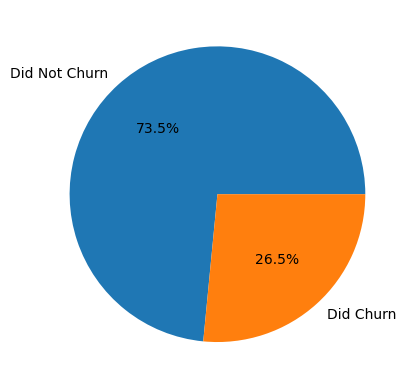

In [4]:
# pie chart churn
e.churn_pie(train)

* Approximately 27% of customers' in the training data have churned

# What's the relationship between churn and automatic payment?

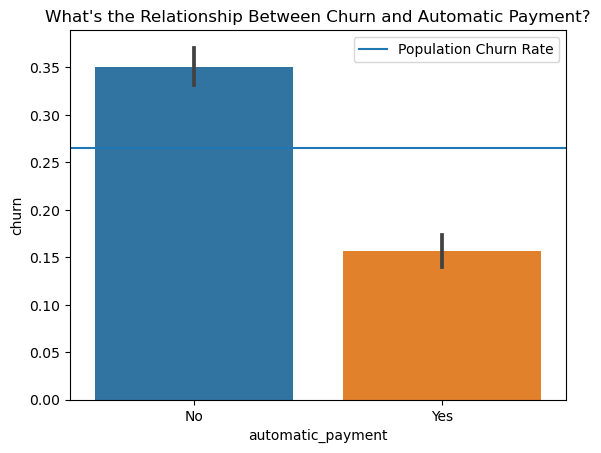

In [5]:
# graph for Churn and Automatic Payment
graph_title_Q1 = "What's the Relationship Between Churn and Automatic Payment?"
feature_Q1 = "automatic_payment"

e.relationship_churn(train_feat, graph_title_Q1, feature_Q1, target)

**I will use chi-square to investigate whether churning and customers' with automatic payment are related**

* I will use a confidence interval of 95%
* The alpha is .05


* $H_o$: 'Churn' and 'Automatic Payment' are independent.
* $H_a$: 'Churn' and 'Automatic Payment' are related.

In [6]:
# Chi squared to compare proportions, define confidence
# alpha is set to 0.05
alpha = 0.05

null_hypothesis_Q1 = "'Churn' and 'Automatic Payments' are independent"
alternative_hypothesis_Q1 = "'Churn' and 'Automatic Payments'are related"

e.cross_function(train_feat, target, feature_Q1, null_hypothesis_Q1, alternative_hypothesis_Q1)

Reject the null hypothesis: 'Churn' and 'Automatic Payments' are independent
Sufficient evidence to move forward understanding that, 'Churn' and 'Automatic Payments'are related
 chi^2 = 201.00756246968632 p = 1.2588150001387785e-45


**The p-value is greater than the alpha. Therefore, we have evidence to support that 'Churn' and 'Automatic Payments'are related. Customers' with 'Automatic Payment' churned less than those who didn't have "Automatic Payment". Based on this, I believe that using the 'Automatic Payment' feature in modeling will likely have a small positive impact on the model's accuracy.**

# What's the relationship between churn and paperless billing?

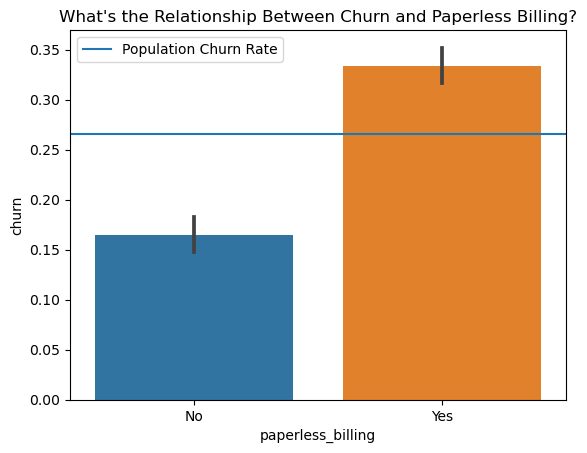

In [7]:
# graph for Churn and Paperless Billing
graph_title_Q2 = "What's the Relationship Between Churn and Paperless Billing?"
feature_Q2 = "paperless_billing"

e.relationship_churn(train_feat, graph_title_Q2, feature_Q2, target)

**I will use chi-square to investigate whether churning and customers' with paperless billing are related**

* I will use a confidence interval of 95%
* The alpha is .05


* $H_o$: 'Churn' and 'Paperless Billing' are independent.
* $H_a$: 'Churn' and 'Paperless Billing' are related.

In [8]:
# Chi squared to compare proportions, define confidence
null_hypothesis_Q2 = "'Churn' and 'Paperless Billing' are independent."
alternative_hypothesis_Q2 = "'Churn' and 'Paperless Billing' are related.'"

e.cross_function(train_feat, target, feature_Q2, null_hypothesis_Q2, alternative_hypothesis_Q2)

Reject the null hypothesis: 'Churn' and 'Paperless Billing' are independent.
Sufficient evidence to move forward understanding that, 'Churn' and 'Paperless Billing' are related.'
 chi^2 = 148.58446697144495 p = 3.5348504574964642e-34


**The p-value is greater than the alpha. Therefore, we have evidence to support that 'Churn' and 'Paperless Billing' are related. Customers' with 'Paperless Billing' churned more than those who didn't. Based on this, I believe that using the 'Paperless Billing' feature in modeling will likely have a small positive impact on the model's accuracy.**

# What's the Relationship Between churn and customers' with a Partner?

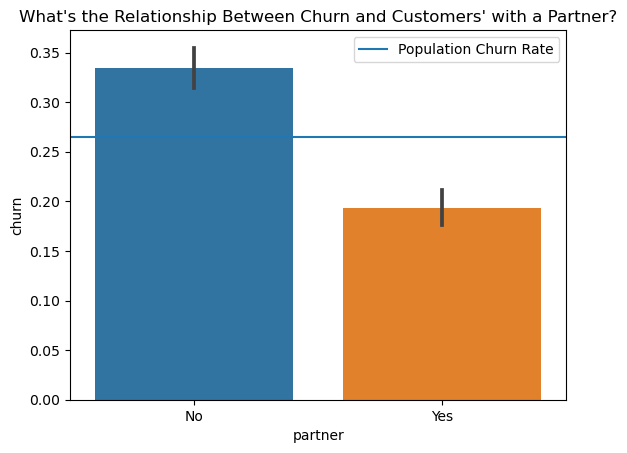

In [9]:
# graph for Churn and Partner
graph_title_Q3 = "What's the Relationship Between Churn and Customers' with a Partner?"
feature_Q3 = "partner"

e.relationship_churn(train_feat, graph_title_Q3, feature_Q3, target)

**I will use chi-square to investigate whether churning and customers' with a Partner?**

* I will use a confidence interval of 95%
* The alpha is .05


* $H_o$: 'Churn' and 'Partner' are independent.
* $H_a$: 'Churn' and 'Partner' are related.

In [10]:
# Chi squared to compare proportions, define confidence
null_hypothesis_Q3 = "'Churn' and 'Partners' are independent"
alternative_hypothesis_Q3 = "'Churn' and 'Partners' are related"

e.cross_function(train_feat, target, feature_Q3, null_hypothesis_Q3, alternative_hypothesis_Q3)

Reject the null hypothesis: 'Churn' and 'Partners' are independent
Sufficient evidence to move forward understanding that, 'Churn' and 'Partners' are related
 chi^2 = 106.63124069338238 p = 5.362120825511991e-25


**The p-value is greater than the alpha. Therefore, we have evidence to support that 'Churn' and 'Partners' are related. Customers' with 'Partners' churned less than those who didn't.Based on this, I believe that using the 'Partners' feature in modeling will likely have a small positive impact on the model's accuracy.**

# What's the relationship between churn and customers' with dependents?

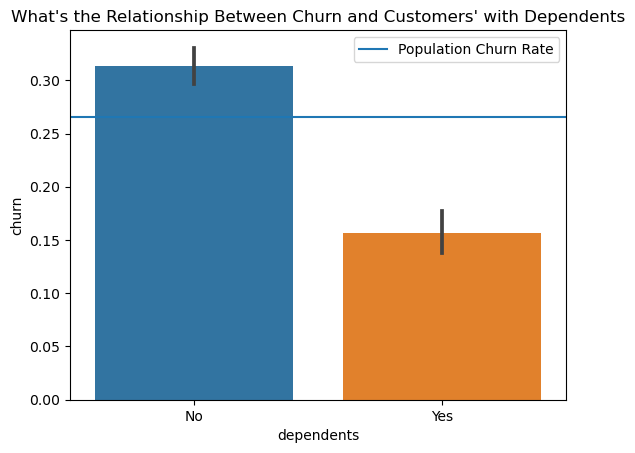

In [11]:
# graph for Churn and Dependents
graph_title_Q4 = "What's the Relationship Between Churn and Customers' with Dependents"
feature_Q4 = "dependents"

e.relationship_churn(train_feat, graph_title_Q4, feature_Q4, target)

**I will use chi-square to investigate whether churning and customers' with Dependents?**

* I will use a confidence interval of 95%
* The alpha is .05


* $H_o$: 'Churn' and 'Dependents' are independent.
* $H_a$: 'Churn' and 'Dependents' are related.

In [12]:
# Chi squared to compare proportions, define confidence
alpha = 0.05

null_hypothesis_Q4 = "'Churn' and 'Dependents' are independent."
alternative_hypothesis_Q4 = "'Churn' and 'Dependents' are related."

e.cross_function(train_feat, target, feature_Q4, null_hypothesis_Q4, alternative_hypothesis_Q4)

Reject the null hypothesis: 'Churn' and 'Dependents' are independent.
Sufficient evidence to move forward understanding that, 'Churn' and 'Dependents' are related.
 chi^2 = 111.74045071817626 p = 4.0728740930257527e-26


**The p-value is greater than the alpha. Therefore, we have evidence to support that 'Churn' and 'Dependents' are related. Customers' with 'Dependents' churned less than those who didn't. Based on this, I believe that using the 'Dependents' feature in modeling will likely have a small positive impact on the model's accuracy.**

# What's the relationship between churn and gender?

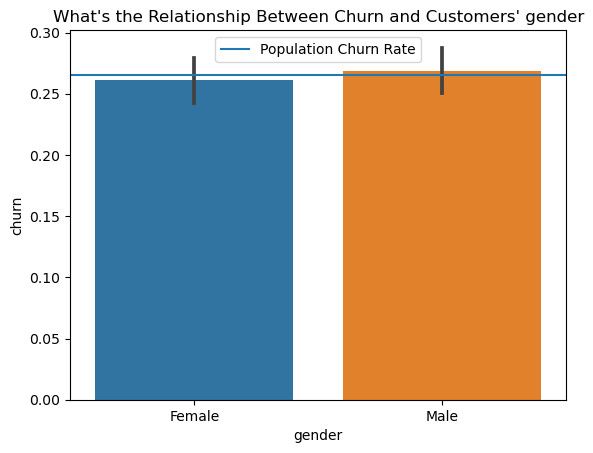

In [13]:
# graph for Churn and Gender
graph_title_Q5 = "What's the Relationship Between Churn and Customers' gender"
feature_Q5 = "gender"

e.relationship_churn2(train_feat, graph_title_Q5, feature_Q5, target)

**I will use chi-square to investigate the relationship between churning and gender**

* I will use a confidence interval of 95%
* The alpha is .05


* $H_o$: 'Churn' and 'Gender' are independent.
* $H_a$: 'Churn' and 'Gender' are related.

In [14]:
# Chi squared to compare proportions, define confidence
null_hypothesis_Q5 = "'Churn' and 'Gender' are independent."
alternative_hypothesis_Q5 = "'Churn' and 'Gender' are related."

e.cross_function(train_feat, target, feature_Q5, null_hypothesis_Q5, alternative_hypothesis_Q5)

Fail to reject the null
Insufficient evidence to reject the null
 chi^2 = 0.26001085636614296 p = 0.6101126964282866


**Because genders and churn are very similar to the average churn, it is not likely that "Gender" will be a useful feature to model on.**

# Does tenure affect whether a customer will churn or not?

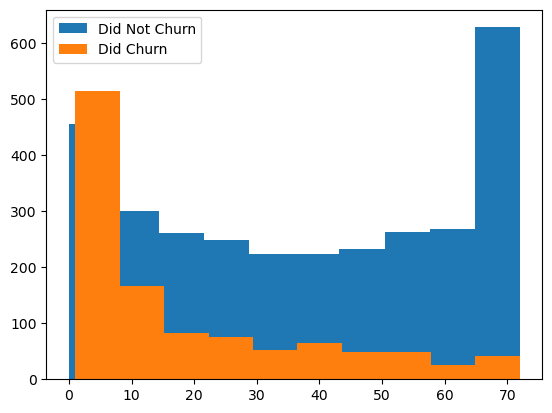

In [15]:
# t-test result
did_churn = train_feat[train_feat.churn == 1]
did_not_churn = train_feat[train_feat.churn == 0]
plt.hist(data=did_not_churn, x='tenure', label="Did Not Churn", color="C0")
plt.hist(data=did_churn, x='tenure', label="Did Churn", color="C1")

plt.legend()
plt.show()

**I will use Independent T-Test to investigate the relationship between churn and tenure**

* I will use a confidence interval of 95%
* The alpha is .05


* $H_o$: 'Tenure' of customers who 'Churn' equals that of those who don't 'Churn'
* $H_a$: 'Tenure' of customers who 'Churn' is not equal to that of those who don't 'Churn'

In [16]:
# t-test to compare tenure, define confidence
null_hypothesis_Q6 = "'Tenure' of customers who 'Churn' equals that of those who don't 'Churn'"
alternative_hypothesis_Q6 = "'Tenure' of customers who 'Churn' is not equal to that of those who don't 'Churn'"
churn_sample = train[train.churn == 1].tenure
no_churn_sample = train[train.churn == 0].tenure

e.tenure_ttest(churn_sample, no_churn_sample, null_hypothesis_Q6, alternative_hypothesis_Q6)

Reject the null hypothesis: 'Tenure' of customers who 'Churn' equals that of those who don't 'Churn'
Sufficient evidence to move forward understanding that, 'Tenure' of customers who 'Churn' is not equal to that of those who don't 'Churn'
p = 8.804788934587683e-137


**The p-value is greater than the alpha. Therefore, we have evidence to support that 'Tenure' of customers who 'Churn' is not equal to that of those who don't 'Churn'. Customers' with low 'Tenure' churned more than those who had high 'Tenure. Based on this, I believe that using the 'Tenue' feature in modeling will likely have a small positive impact on the model's accuracy.**

# Exploration Summary

* "Automatic Payment" was found to be a driver of "Churn", Customers' with 'Automatic Payment' churned less than those who didn't have 'Automatic Payment'.
* "Paperless Billing" was found to be a driver of "Churn", customers' with 'Paperless Billing' churned more than those who didn't have 'Paperless Billing'.
* "Partner" was found to be a driver of "Churn",  customers' with 'Partners' churned less than those who didn't.
* "Dependents" was found to be a driver of "Churn", customers' with 'Dependents' churned less than those who didn't.
* "Gender" was not found to be a driver of "Churn"
* "Tenure" was found to be a driver of "Churn", 'Tenure' of customers who 'Churn' is not equal to that of those who don't 'Churn'

# Features continuing to modeling

* "Automatic Payment" was found to be a driver of "Churn" (small difference in churn percentage, but relationship to churn is statistically significant)
* "Paperless Billing" was found to be a driver of "Churn" (small difference in churn percentage, but relationship to churn is statistically significant)
* "Partner" was found to be a driver of "Churn" (small difference in churn percentage, but relationship to churn is statistically significant)
* "Dependents" was found to be a driver of "Churn" (small difference in churn percentage, but relationship to churn is statistically significant)
* "Tenure" was found to be a driver of "Churn" (small difference in churn percentage, but relationship to churn is statistically significant)


# Features not continuing to modeling
* "Gender" was found to be a driver of "Churn"  (There is no evidence that "Gender" is a driver of churn)

# Modeling

* My evaluation metric will use accuracy.
    - positive class:  not churned
    - negative class:  churned
* Non-churn is approximately 73% of the data.

* Assuming non-churn for every customer, the baseline accuracy is 73%, and will continue to use for this project.
* I will be evaluating models developed using three different model types and various hyperparameter configurations.
* Models will be evaluated on train and validate data.
* The model that performs the best will then be evaluated on test data.

In [17]:
# baseline accuracy 
baseline_accuracy = (train.churn == 0).mean()
round(baseline_accuracy, 3)

0.735

In [18]:
#  prep data for modeling
x_train, y_train, x_validate, y_validate, x_test, y_test = m.create_x_y(train, validate, test, target)

# Decision Tree Model  

In [19]:
# decision tree results
m.best_tree(x_train, y_train, x_validate, y_validate)


    Accuracy of Decision Tree classifier on training set: 0.78
    Accuracy of Decision Tree classifier on validation set: 0.77
    


* The Decision Tree is greater thant the baseline.

# Random Forest model

In [20]:
m.best_forest(x_train, y_train, x_validate, y_validate)


    Accuracy of Random Forest on training set: 0.78
    Accuracy of Random Forest on validation set: 0.78
    


* The Random Forest is is greater thant the baseline.

# Logistic Regression Model

In [21]:
# logistic regression results
m.logit_accuracy(x_train, y_train, x_validate, y_validate)



    Accuracy of Logistic Regression on training set: 0.77
    Accuracy of Logistic Regression on validation set: 0.77
    


* The Linear Regression is greater thant the baseline.

# KNN Model

In [22]:
# the knn results
m.best_knn(x_train, y_train, x_validate, y_validate)


    Accuracy of KNN on training set: 0.79
    Accuracy of KNN on validation set: 0.75
    


* The KNN Model is greater thant the baseline, however validation is lower than the train score, possibly due to overfitting.

# Comparing Models

* Decision Tree performed performed greater than the baseline for train and validation, however validation was slightly under the train score.
* Logistic Regression models performed greater than the baseline.
* KNN model performed the best train score, however the validation score is approx. 4% lower than the train score, possibly due to overfitting.
* The Random Forest model performed the best overall with approx. 5% greater than the baseline.
* I have chosen to move forward with the Random Forest model.

## Random Forest on Test 

In [23]:
# get test results for final model
m.best_model(x_train, y_train, x_validate, y_validate, x_test, y_test)


    Accuracy of RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=3) on training set: 0.78
    Accuracy of RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=3) on validation set: 0.78
    Accuracy of RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=3) on test set: 0.76
    


### Modeling Summary 
* Decision Tree and Logistic Regression models performed greater than the baseline.
* The Logistic Regression model performed slightly greater in train but less in validation, possibly due to overfitting.
* KNN models performed less than the baseline on train and validate.
* A Random Forest model selected as the final model and had an accuracy of 76%.

# Conclusions

### Exploration
* "Automatic Payment" was found to be a driver of "Churn", customers' with auto pay set were not churning as often
* "Paperless Billing" was found to be a driver of "Churn",  customers' with paperless billing were churning more
* "Partner" was found to be a driver of "Churn", are more likely to churn if the customer does not have a partner
* "Dependents" was found to be a driver of "Churn", are more likely to churn if the customer does not have dependents
* "Gender" was not found to be a driver of "Churn"
* "Tenure" was found to be a driver of "Churn", Customers' with low 'Tenure' churned more than those who had high 'Tenure

### Modeling
The final model failed to outperform the baseline. Possible reasons include:
* Limited amount of features

### Recommendations
* To decrease the likelihood of customers churning offer a small incentive for customers to initiate automatic payments.
* To decrease the likelihood of customers' with low tenure, dependents, or partners from churning, offer these selected customers discounted rates for longer contracts.

### Next Steps
* I would like to explore further into paperless billing and tenure, to explore other possible factors that contribute to the relationship.
* I would like to explore other features, such as monthly payments and internest service providers to find other driving factors. 